## Imports

In [6]:
from sklearn import datasets, svm, metrics, neighbors, cluster
import matplotlib.pyplot as plt
import numpy as np

## Load digits

In [8]:
digits = datasets.load_digits()

digits.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits.data.shape

(1797, 64)

## Plot digits

In [10]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
zipped = zip(digits.images, digits.target) # returns iteratable items as tuples
images_and_labels = list(zipped) # create a list from our touples to iterate over

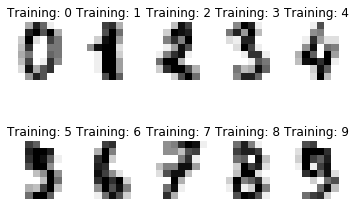

In [5]:
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## Split sets into 70% training and 30% test

In [8]:
num_split = int(0.7*len(digits.data))
train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


# Set up classifier

In [9]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm = 'brute') # Set up classifer

In [10]:
classifier.fit(train_features,train_labels)   # Fit to training data

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Predict test features

In [11]:
predicted_labels = classifier.predict(test_features)

# Visaulize 5-nearest neighbors

In [12]:
distances, neighbors = classifier.kneighbors(test_features) 


Neigbours to image 0: [[ 4.    11.662]
 [ 4.    16.941]
 [ 4.    18.166]
 [ 4.    19.313]
 [ 4.    20.199]]
Predicted:  4
Neigbours to image 1: [[ 0.    21.095]
 [ 0.    21.471]
 [ 0.    21.61 ]
 [ 0.    21.749]
 [ 0.    21.817]]
Predicted:  0
Neigbours to image 2: [[ 5.    18.028]
 [ 5.    18.193]
 [ 5.    19.621]
 [ 5.    21.166]
 [ 5.    21.932]]
Predicted:  5
Neigbours to image 3: [[ 3.    10.954]
 [ 3.    17.607]
 [ 3.    19.748]
 [ 3.    22.583]
 [ 3.    23.13 ]]
Predicted:  3
Neigbours to image 4: [[ 6.    12.961]
 [ 6.    13.416]
 [ 6.    14.799]
 [ 6.    15.33 ]
 [ 6.    16.401]]
Predicted:  6
Neigbours to image 5: [[ 9.    19.261]
 [ 9.    22.825]
 [ 9.    23.409]
 [ 9.    23.643]
 [ 9.    23.664]]
Predicted:  9
Neigbours to image 6: [[ 6.    14.832]
 [ 6.    15.033]
 [ 6.    15.78 ]
 [ 6.    16.733]
 [ 6.    17.176]]
Predicted:  6
Neigbours to image 7: [[ 1.    25.1  ]
 [ 1.    29.086]
 [ 8.    33.03 ]
 [ 1.    34.029]
 [ 1.    34.641]]
Predicted:  1
Neigbours to image 8: [[

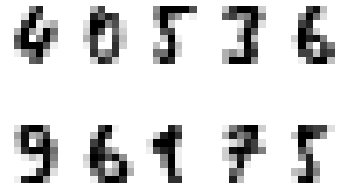

In [13]:
distances.shape  # Visaulize neighbors

test_features.shape
#for i in neighbors:
#    for n in neighbors[1]:

      
for index, image in enumerate(test_features[:10]):
    P = plt.subplot(2, 5, index + 1)
    # How to add xlabels to subplot??
    labels = train_labels[neighbors[index][:]]
    label_and_dist = list(zip(labels, distances[index]))
    print("{}{}{}{}".format("Neigbours to image ", index, ": ", np.around(label_and_dist,3)))
    print("Predicted: ", predicted_labels[index])
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    

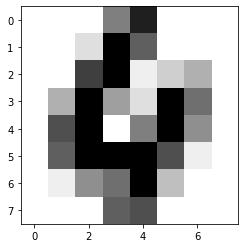

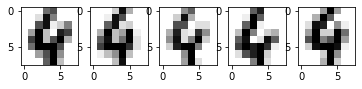

In [14]:
plt.figure(1)
plt.imshow(test_features[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.figure(2)
for index, nb in enumerate(neighbors[0]):
    plt.subplot(1,5,index+1)
    plt.imshow(train_features[nb].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

    

# Print classification report and confusion matrix

In [15]:
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



Precision: TP / (TP + FP). "How many samples classified as X were correct?"  
Recall: TP / (TP + FN). "How many of samples that should have been classifed as X were found as X?"  
F1-score: 2*precision+recall/(precision+recall). "Weighed avarage between precision and recall"  
Support: Nbr of occurances in each class.   
Accuracy = (TP + TN)/(TP+TN+FP+FN) "How many samples were classified correctly as “X” or “not X” 

In [16]:
print(metrics.confusion_matrix(test_labels, predicted_labels))

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 55  0  0  1  1  0]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  0  0  0  0  1 47  1]
 [ 0  0  0  1  0  2  0  0  0 52]]


Here we had for example 1 false positive for number 0 (first row) as 4

# K-Means, cluster into k-clusters

In [17]:
print(np.array(train_features[:10]))

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

In [18]:
clustering = cluster.KMeans(n_clusters=10, init = np.array(train_features[10:20]), n_init = 1)  # We can try other numbers when visualizing cluster centers

In [19]:
clusters = clustering.fit(train_features)


(10, 64)


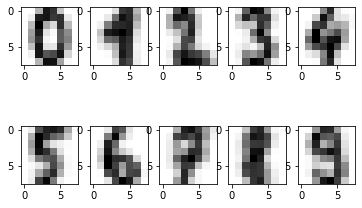

In [20]:
print(clusters.cluster_centers_.shape)
for index, center_image in enumerate(clusters.cluster_centers_[:]):
    P = plt.subplot(2, 5, index + 1);
    plt.imshow(center_image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')


Can we visualize clusters better? PCA to lower the dimensional space?

In [21]:
predicted_labels = clustering.predict(test_features)
print("Test labels: \n", test_labels)
print("Predicted labels: \n", predicted_labels)
print(metrics.classification_report(test_labels, predicted_labels))

Test labels: 
 [4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7
 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1
 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5
 7 9 5 4 8 8 4 9 0 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3
 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4
 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5
 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1
 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 2 5 7 9 5 4 4 9 0
 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5
 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1
 5 0 9 5 2

In [22]:
print(metrics.confusion_matrix(test_labels, predicted_labels))

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 17  0  0  0  1  0  0 35  0]
 [ 1  0 42  7  0  0  0  0  0  3]
 [ 0  0  0 41  0  2  0  3  6  1]
 [ 1  1  0  0 52  0  0  3  0  0]
 [ 0  0  0  0  1 38  1  0  0 16]
 [ 0  1  0  0  0  0 52  0  1  0]
 [ 0  0  0  0  0  0  0 52  2  0]
 [ 0  1  1  1  0  1  0  3 33 12]
 [ 0  5  0  3  0  4  0  1  0 42]]


In [23]:
print("Completeness score: ", metrics.completeness_score(test_labels, predicted_labels), "- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.")
print("Homogeneity score: ", metrics.homogeneity_score(test_labels, predicted_labels), "- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.")
print("Adjusted mutual info: ", metrics.adjusted_mutual_info_score(test_labels, predicted_labels), "Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance")

Completeness score:  0.7478172502225956 - A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
Homogeneity score:  0.7360129522825359 - A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
Adjusted mutual info:  0.7325974722699254 Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance
